In [221]:
library(ggplot2)
library(ggmap)
library(ggalt)
library(dplyr)
library(plyr)
library(psych)
options(warn=-1)
require(gridExtra)

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [96]:
df <- read.csv("Melbourne_housing_FULL-26-09-2017.csv")

# Melbourne Housing Market Data

This is a dataset of recent Melbourne house sales with locations and some house features included. We will explore the dataset and gain some insight into the housing market in Melbourne

Found on https://www.kaggle.com/anthonypino/melbourne-housing-market/data credit to Tony Pino

In [87]:
dim(df)

[1] 23547    21

In [88]:
str(df)

'data.frame':	23547 obs. of  21 variables:
 $ Suburb       : Factor w/ 336 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address      : Factor w/ 23108 levels "1 Abercrombie St",..: 20002 22084 10427 6622 17071 15745 18380 5650 18185 23076 ...
 $ Rooms        : int  2 2 2 3 3 3 4 4 2 2 ...
 $ Type         : Factor w/ 3 levels "h","t","u": 1 1 1 3 1 1 1 1 1 1 ...
 $ Price        : int  NA 1480000 1035000 NA 1465000 850000 1600000 NA NA NA ...
 $ Method       : Factor w/ 9 levels "PI","PN","S",..: 7 3 3 8 6 1 8 5 3 3 ...
 $ SellerG      : Factor w/ 330 levels "@Realty","Abercromby's",..: 147 30 30 269 30 30 208 208 30 65 ...
 $ Date         : Factor w/ 58 levels "1/07/2017","10/09/2016",..: 44 46 48 48 49 49 50 52 52 52 ...
 $ Distance     : Factor w/ 212 levels "#N/A","0","0.7",..: 82 82 82 82 82 82 82 82 82 82 ...
 $ Postcode     : Factor w/ 207 levels "#N/A","3000",..: 55 55 55 55 55 55 55 55 55 55 ...
 $ Bedroom2     : int  2 2 2 3 3 3 3 3 4 3 ...
 $ Bathroom     : 

In [89]:
cat_var = c(1,2,4,6:8,10,17:21)

In [90]:
# 

# Cleaning 
Change format of the date 

In [97]:
df$Date = as.Date(df$Date, format = "%d/%m/%Y")

Making distance a numeric variable as its an important measure

In [98]:
df$Distance <- as.numeric(as.character(df$Distance))

In [85]:
head(df)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
23542,Williamstown,96 Verdon St,4,h,2500000,Passed In,Sweeney,2017-08-26,6.8,3016,⋯,1,5,866,157,1920,,-37.85908,144.8930,Western Metropolitan,6380
23543,Wyndham Vale,25 Clitheroe Dr,3,u,NA,2,Harcourts,2017-08-26,27.2,3024,⋯,1,0,552,119,1990,,-37.90032,144.6184,Western Metropolitan,5262
23544,Wyndham Vale,19 Dalrymple Bvd,4,h,NA,3,hockingstuart,2017-08-26,27.2,3024,⋯,NA,NA,NA,NA,NA,,-37.87882,144.6018,Western Metropolitan,5262
23545,Yallambie,17 Amaroo Wy,4,h,1100000,3,Buckingham,2017-08-26,12.7,3085,⋯,3,2,NA,NA,NA,,-37.72006,145.1055,Northern Metropolitan,1369
23546,Yarraville,6 Agnes St,4,h,1285000,6,Village,2017-08-26,6.3,3013,⋯,1,1,362,112,1920,,-37.81188,144.8845,Western Metropolitan,6543
23547,Yarraville,33 Freeman St,4,h,1050000,8,Village,2017-08-26,6.3,3013,⋯,2,2,NA,139,1950,,-37.81829,144.8740,Western Metropolitan,6543


#### Number of Missing values by columns

In [8]:
colSums(is.na(df))

Suburb       Address         Rooms          Type         Price 
            0             0             0             0          5151 
       Method       SellerG          Date      Distance      Postcode 
            0             0             0             1             0 
     Bedroom2      Bathroom           Car      Landsize  BuildingArea 
         4481          4484          4626          6137         13529 
    YearBuilt   CouncilArea     Lattitude    Longtitude    Regionname 
        12007             0          4304          4304             0 
Propertycount 
            0

Here are the counts for null values. 
 - Price missing pribably means it was undisclosed. 
 - Bedrooms, Bathrooms, Landsize and Car could mean its not a residential building
 - Some like Lattitude and Longtitude could be just missing values
 
 

In [102]:
summary(df[,-cat_var])

     Rooms            Price            Distance        Bedroom2     
 Min.   : 1.000   Min.   :  85000   Min.   : 0.00   Min.   : 0.000  
 1st Qu.: 2.000   1st Qu.: 633000   1st Qu.: 6.20   1st Qu.: 2.000  
 Median : 3.000   Median : 880000   Median : 9.50   Median : 3.000  
 Mean   : 2.976   Mean   :1056697   Mean   :10.31   Mean   : 2.952  
 3rd Qu.: 4.000   3rd Qu.:1302000   3rd Qu.:13.00   3rd Qu.: 4.000  
 Max.   :12.000   Max.   :9000000   Max.   :48.10   Max.   :30.000  
                  NA's   :5151      NA's   :1       NA's   :4481    
    Bathroom           Car            Landsize         BuildingArea    
 Min.   : 0.000   Min.   : 0.000   Min.   :     0.0   Min.   :    0.0  
 1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.:   181.0   1st Qu.:   95.0  
 Median : 1.000   Median : 2.000   Median :   448.0   Median :  129.0  
 Mean   : 1.571   Mean   : 1.626   Mean   :   551.8   Mean   :  154.5  
 3rd Qu.: 2.000   3rd Qu.: 2.000   3rd Qu.:   656.0   3rd Qu.:  180.0  
 Max.   :12.000 

In [177]:
corr(df[,-cat_var])

ERROR: Error in eval(expr, envir, enclos): could not find function "corr"


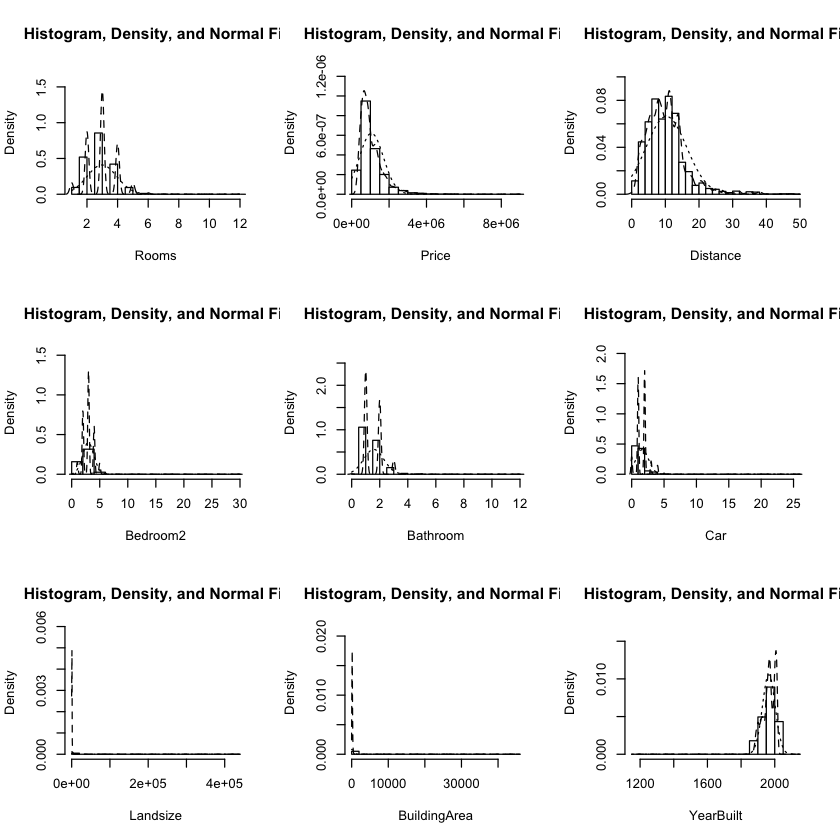

In [101]:
options(repr.plot.width=7, repr.plot.height=7)
multi.hist(df[,-cat_var]) #error, not numeric

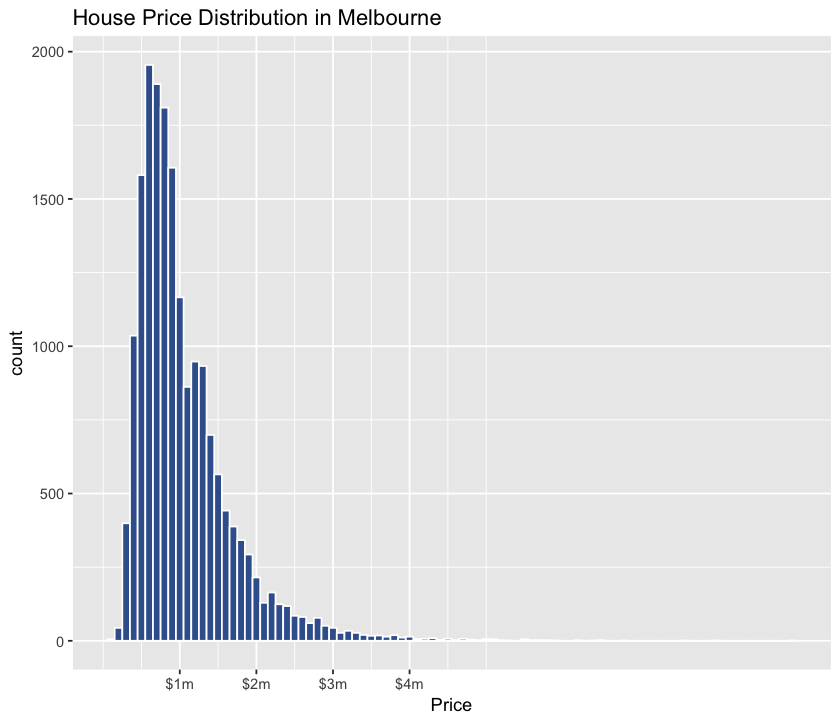

In [220]:
ggplot(df, aes(Price))+
  geom_histogram(binwidth = 100000,color = "white", fill = "#3c619b")+
  scale_x_continuous(breaks = c(1000000,2000000,3000000,4000000),
                     labels = c("$1m","$2m","$3m","$4m"))+
  ggtitle("House Price Distribution in Melbourne")

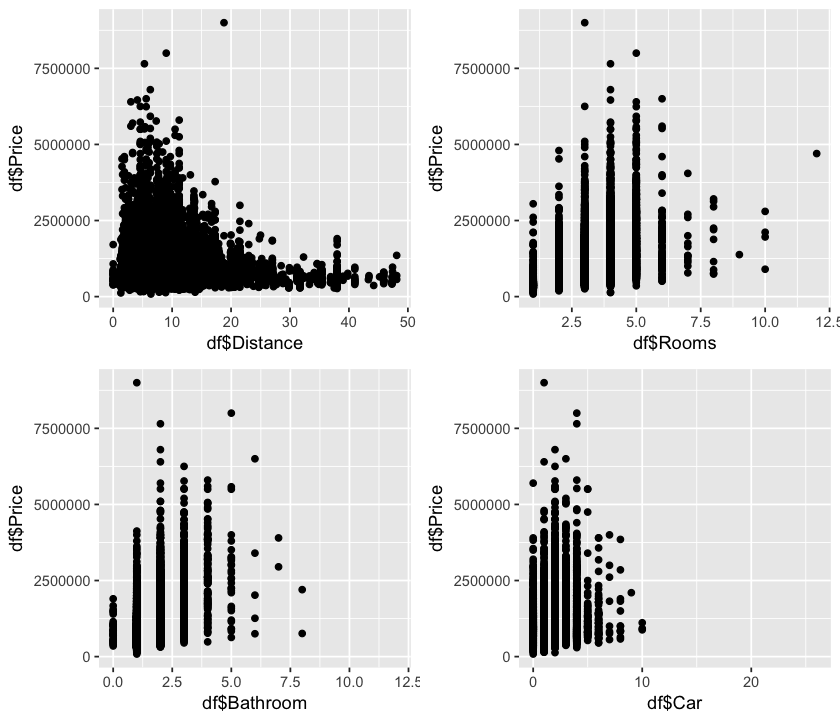

In [233]:
plot1 <- qplot(df$Distance,df$Price)
plot2 <- qplot(df$Rooms,df$Price)
plot3 <- qplot(df$Bathroom,df$Price)
plot4 <- qplot(df$Car,df$Price)
grid.arrange(plot1, plot2,plot3, plot4, ncol=2, nrow=2)

## What do houses in Melbourne look like

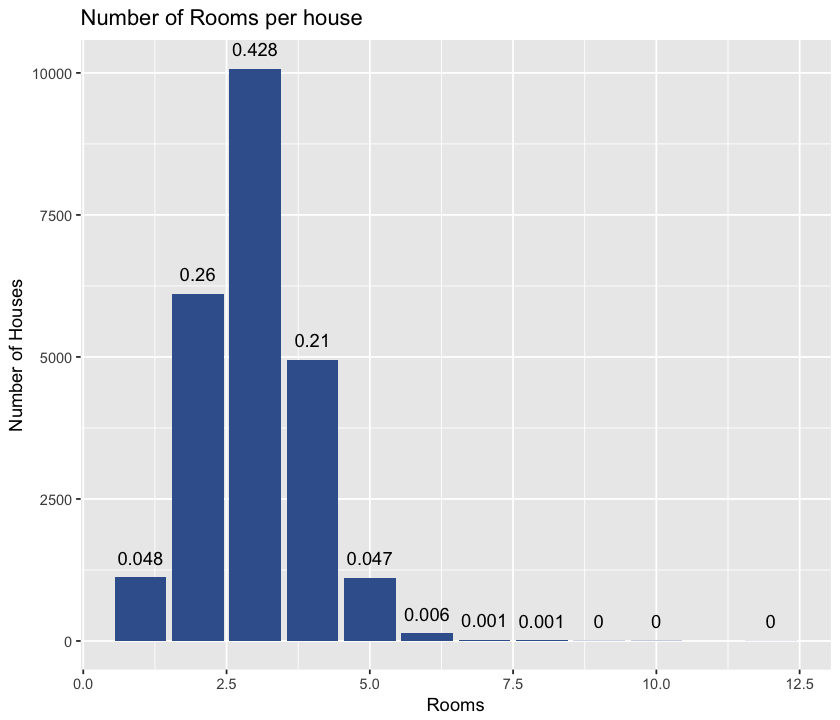

In [184]:
options(repr.plot.width=7, repr.plot.height=6)
g <- ggplot(df, aes(x = Rooms,label = Method))
g + geom_bar(fill = "#3c619b") + geom_text(stat='count',aes(label=round((..count..)/sum(..count..),3)),vjust=-1)  + ggtitle('Number of Rooms per house')+ ylab('Number of Houses')

We have to subset the data as there are some houses built prior to the gold rush which we are not interested in and a few houses with incorrect years which need to be corrected or excluded,

In [126]:
subset1 <- subset(df, (!is.na(df$YearBuilt)) &(df$YearBuilt > 1850) & (df$YearBuilt < 2017))

`geom_smooth()` using method = 'gam'


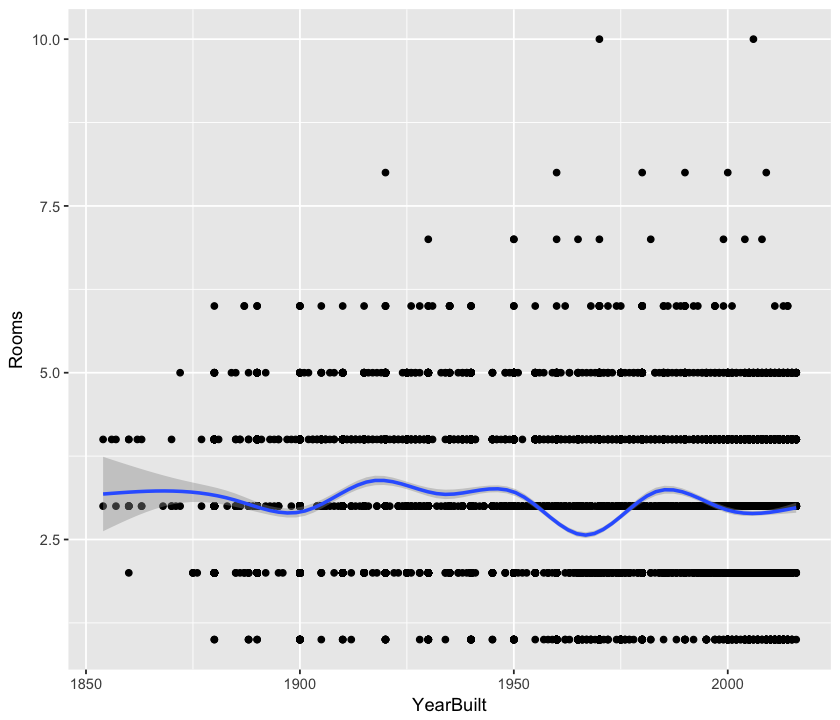

In [130]:
g <- ggplot(subset1, aes(x=  YearBuilt, y = Rooms))
g + geom_point() + geom_smooth()

In [79]:
options(repr.plot.width=5, repr.plot.height=4)

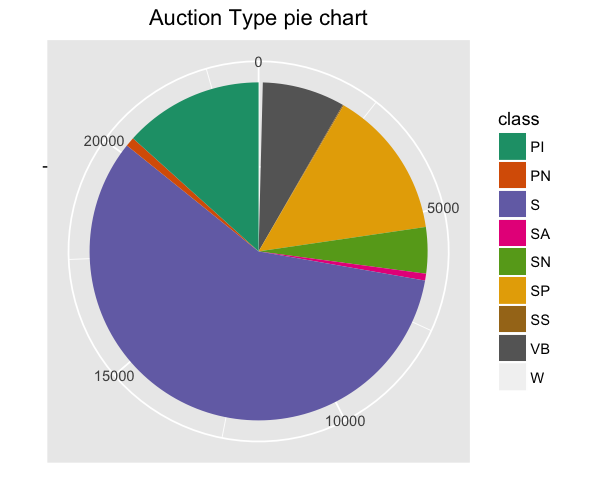

In [80]:
pie <- ggplot(df, aes(x = "", fill = factor(Method))) + 
  geom_bar(width = 1) +
  theme(axis.line = element_blank(), 
        plot.title = element_text(hjust=0.5)) + 
  labs(fill="class", 
       x=NULL, 
       y=NULL, 
       title="Auction Type pie chart") 

pie + coord_polar(theta = "y", start=0) + scale_fill_brewer(palette="Dark2")

S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

58% of the houses are sold (S) during the Auction  and another 14.3% prior to the auction(SP). 

13.3% are "Passed in"(PI) meaning not sold.

`geom_smooth()` using method = 'gam'


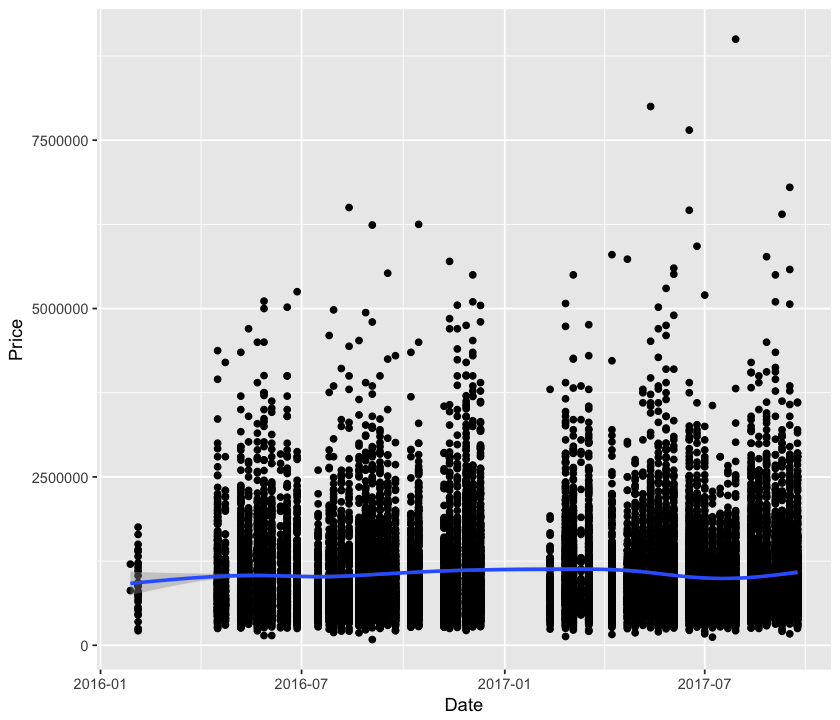

In [186]:
g <- ggplot(df, aes(x = Date, y = Price, ))
g + geom_point() + geom_smooth()

### Geospatial Visualisation

In [190]:
melbourne <- geocode('Melbourne',messaging = FALSE)

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Melbourne


In [191]:
melbourne_ggl_sat_map <- qmap('melbourne', zoom = 10, source = 'google', maptype= "roadmap")

Source : https://maps.googleapis.com/maps/api/staticmap?center=melbourne&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN
Source : https://maps.googleapis.com/maps/api/geocode/json?address=melbourne


In [110]:
agg_df <- aggregate(Price ~ Suburb, df, median)

In [111]:
places = df[,c('Longtitude','Lattitude','Suburb')]

In [112]:
places <- places[!duplicated(places$Suburb), ]

In [113]:
places <- merge(x = places, y = agg_df, by = "Suburb", all.x = TRUE)

In [114]:
places1 <- na.omit(places)

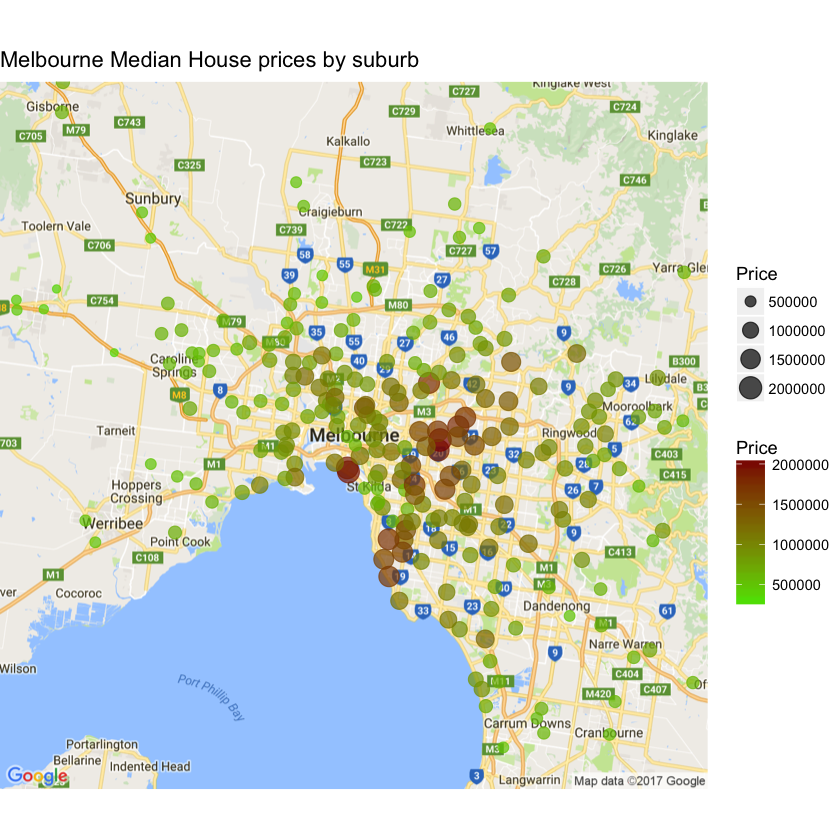

In [115]:
melbourne_ggl_sat_map + geom_point(aes(x=Longtitude,y=Lattitude, size=Price,color=Price),
                                   data = places1,
                                   alpha = 0.7
                                   ) + scale_colour_gradient2(low = "lightgreen", mid = "green", high = "darkred") + ggtitle("Melbourne Median House prices by suburb") 

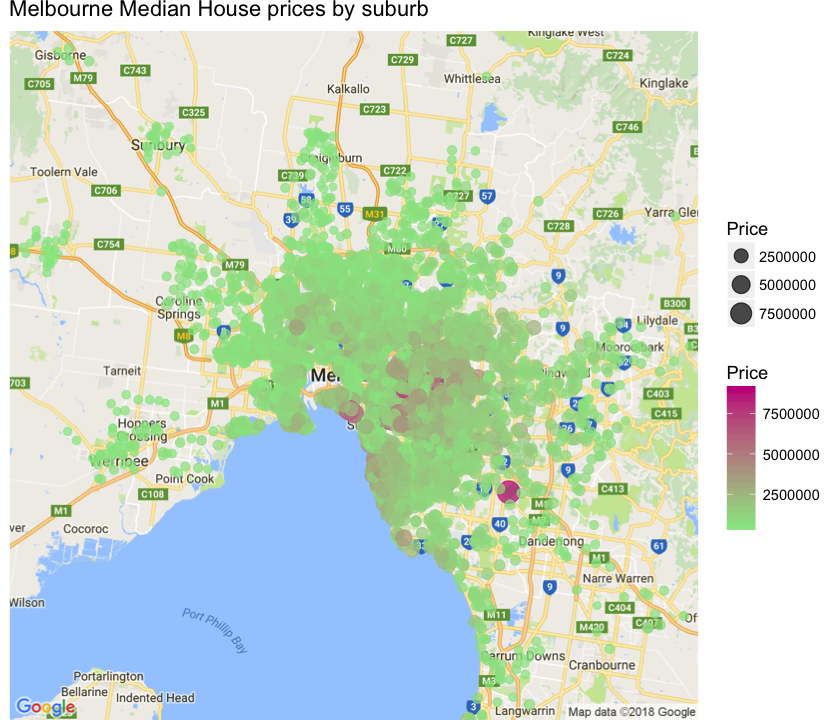

In [218]:
melbourne_ggl_sat_map + geom_point(aes(x=Longtitude,y=Lattitude, size=Price,color=Price),
                                   data = df_full,
                                   alpha = 0.7
                                   ) + scale_colour_gradient2(low = '#e5f5f9', mid = 'lightgreen', high='#c51b8a') +
            ggtitle("Melbourne Median House prices by suburb") 


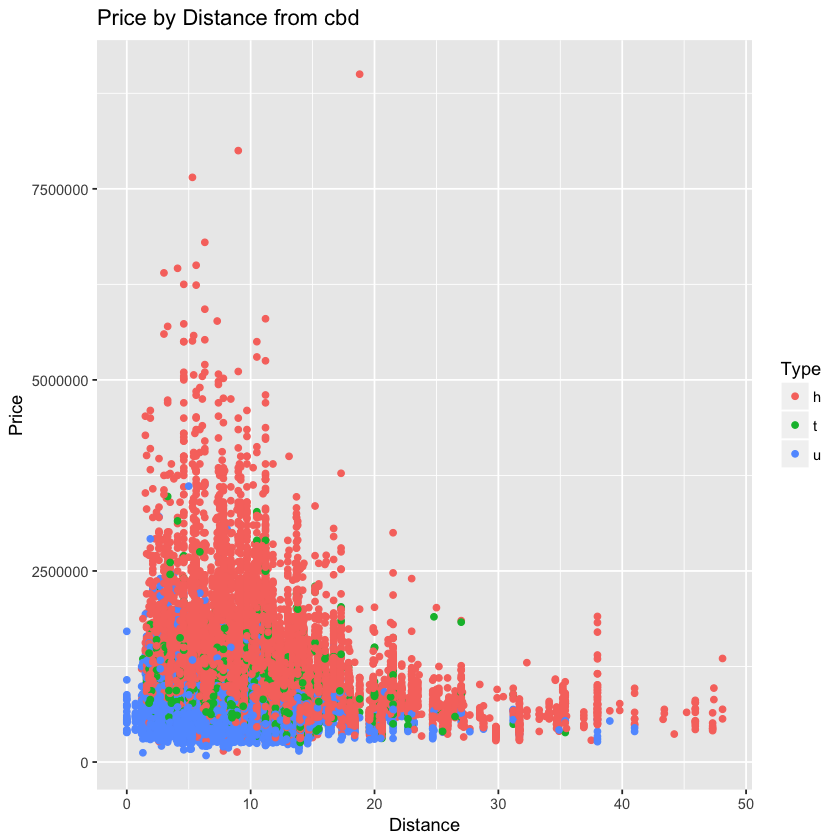

In [117]:
p <- ggplot(df, aes(x = Distance, y = Price,color=Type))
p + geom_point() +
     ggtitle('Price by Distance from cbd') +
     xlab('Distance') +
     ylab('Price')

# Aggregated Queries

In [135]:
agg_df <- aggregate(Price ~ Suburb, df, mean)

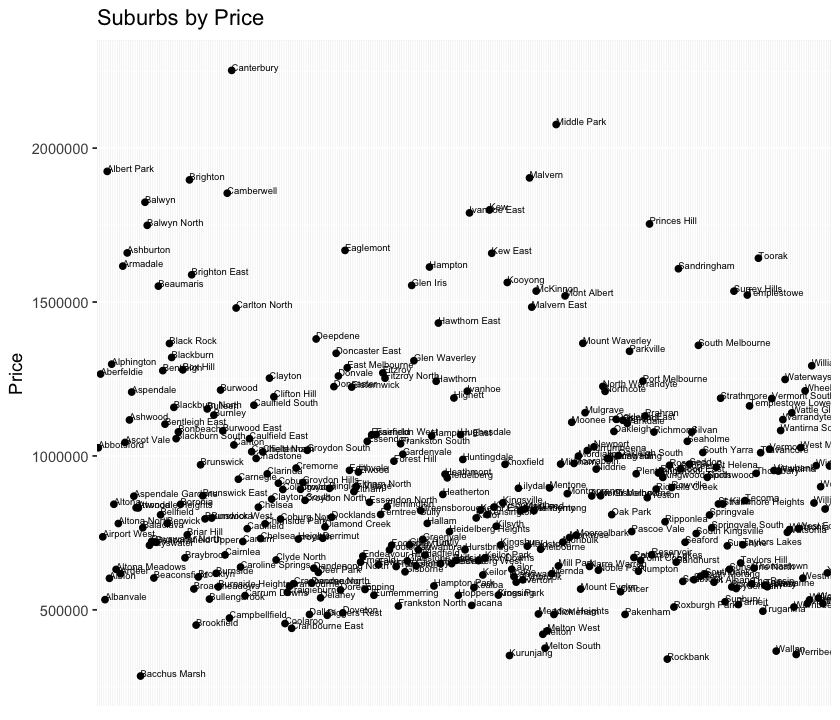

In [136]:
ggplot(agg_df, aes(x=Suburb,y=Price)) +
    geom_point() + 
    geom_text(aes(label=Suburb),hjust=0, vjust=0, size=2) +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
    
) + ggtitle('Suburbs by Price')

### 5 of the most expensive suburbs by mean price.

In [120]:
na.omit(df) %>%
  group_by(Suburb)%>%
  summarise(mean_stat = mean(Price)) %>%
  arrange(desc(mean_stat)) %>%
  top_n(n = 5, wt = mean_stat)  

Suburb,mean_stat
Kooyong,3080000
Canterbury,2438135
Middle Park,2295167
Beaumaris,2130400
Malvern,2059875


### 5 of the most expensive suburbs by median price.


In [121]:
na.omit(df) %>%
  group_by(Suburb)%>%
  summarise(median_stat = median(Price)) %>%
  arrange(desc(median_stat)) %>%
  top_n(n = 5, wt = median_stat) 

Suburb,median_stat
Kooyong,3080000
Canterbury,2362500
Carlton North,2000000
Malvern,1995000
Middle Park,1965000


# External Links


1. A more macro look at the Melbourne housing market - https://www.youtube.com/watch?v=CCEB_ivNyj0